# 1 Author

**Ritwik Sinha**

#2 Problem Formulation

Using the MLEnd Hums and Whistles dataset, I will be building a machine learning pipeline that takes as an input a combination of Panther, Potter, StarWars, Rain, Hakuna, Mamma, Showman, and Frozen audio segments and predicts their song labels using Random Forest Classifier and Support Vector Machine.

#3 Machine Learning Pipeline
The project begins with importing the neccessary libraries, although there are some libraries which I have imported at the point where it needs to be used.

Next steps include, loading of datasets on google drive. I already have Potter and StarWars audio files on my google drive, so I have downloaded audio files of Panther, Rain, Hakuna, Mamma, Showman, and Frozen using URL.

Then I unzipped the new zip files in a new folder at the same directory. Rectified the dataset by removing the whitespaces and then converted all the file names in lowercase. All the rectified audio files are then transferred into another new folder for further processing.



#4 Transformation Stage
This stage comprises of converting audio files in a table format, then converting them into a dataframe. Next step includes feature extraction, I have extracted three features: Mel-frequency cepstral coefficients (MFCC), Spectral Bandwidth and Tempo. Moving further, I have created a new dataframe with comprising of Song column from the earlier dataframe and all the features extracted. In order to have better visibility, I have created another dataframe for features only, which are having float values of all of the features. Created a target variable, storing all the song labels. Converted features to numpy array. Mapped all the features after performing label encoding.

#5 Modelling
This stage consists of implementing two models, one is Random Forest Classifier and the second one is Support Vector Machine. I have implemented two models in order to compare which model gives better evaluation matrices.

#6 Methodology
This stage comprises of computing various evaluation matrices, inclusive of accuracies, precision, recall, f1-score, support and confusion matrix.

#7 Dataset
Understanding the data is really important, thus I have plotted certain graphs inclusive of histograms of display of audio files, different features, and plotting of correlation coefficient heatmap and confusion matrix.

#8 Results
All the description regarding different steps of project building that I stated in the above steps are practically implemented in this stage. From the very beginning of importing libraries till the step of plotting the confusion matrix covers under this stage.

In [ ]:
# Installing pydub library

!pip install -q pydub

In [ ]:
# Importing libraries

import tensorflow as tf
import tensorflow_datasets as tfds
from IPython.display import Audio
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import os, sys, re, pickle, glob
import urllib.request
import zipfile
import IPython.display as ipd
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This needs to be run only once

def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [ ]:
# This needs to be run only once

url1  = "https://collect.qmul.ac.uk/down?t=45O07QG5SKLC2TKN/6PEIJD5VEBGBEUSOHNLOA9G"
save_path1 = '/content/drive/MyDrive/MyData/BasicData/Panther.zip'
download_url(url1, save_path1)

url2  = "https://collect.qmul.ac.uk/down?t=4P72B2L5GL523LHN/45P01OI1U1H0JI9A71FJD5O"
save_path2 = '/content/drive/MyDrive/MyData/BasicData/Rain.zip'
download_url(url2, save_path2)

url3  = "https://collect.qmul.ac.uk/down?t=6H02BFJHA636Q8I3/6L6THHTCDNMO8DINPONDPU0"
save_path3 = '/content/drive/MyDrive/MyData/BasicData/Hakuna.zip'
download_url(url3, save_path3)

url4  = "https://collect.qmul.ac.uk/down?t=5D2T3KJDBM97IFIV/6502927BLQM47TOK1HHGRD8"
save_path4 = '/content/drive/MyDrive/MyData/BasicData/Mamma.zip'
download_url(url4, save_path4)

url5  = "https://collect.qmul.ac.uk/down?t=4T6DJTO8V8UT96VO/51V196CQBV9RKU4LHNN9OE0"
save_path5 = '/content/drive/MyDrive/MyData/BasicData/Showman.zip'
download_url(url5, save_path5)

url6  = "https://collect.qmul.ac.uk/down?t=554TLM8MUGTT51F6/6L0250F2IUDN483TSO090D0"
save_path6 = '/content/drive/MyDrive/MyData/BasicData/Frozen.zip'
download_url(url6, save_path6)

In [ ]:
# Viewing the folders at the given path

path = '/content/drive/MyDrive/MyData/BasicData'
os.listdir(path)

['advancesample',
 'newadvancesample',
 'sample',
 'newsample',
 'Hakuna.zip',
 'Panther.zip',
 'Showman.zip',
 'StarWars_1.zip',
 'Rain.zip',
 'Mamma.zip',
 'Potter_1.zip',
 'StarWars_2.zip',
 'Potter_2.zip',
 'Frozen.zip']

In [ ]:
# Code to unzip the zip folders. Needs to be run only once

directory_to_extract_to = '/content/drive/MyDrive/MyData/BasicData/advancesample/'

zip_path1 = '/content/drive/MyDrive/MyData/BasicData/Potter_1.zip'
with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path2 = '/content/drive/MyDrive/MyData/BasicData/StarWars_1.zip'
with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path3 = '/content/drive/MyDrive/MyData/BasicData/Panther.zip'
with zipfile.ZipFile(zip_path3, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path4 = '/content/drive/MyDrive/MyData/BasicData/Rain.zip'
with zipfile.ZipFile(zip_path4, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path5 = '/content/drive/MyDrive/MyData/BasicData/Hakuna.zip'
with zipfile.ZipFile(zip_path5, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path6 = '/content/drive/MyDrive/MyData/BasicData/Mamma.zip'
with zipfile.ZipFile(zip_path6, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path7 = '/content/drive/MyDrive/MyData/BasicData/Showman.zip'
with zipfile.ZipFile(zip_path7, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path8 = '/content/drive/MyDrive/MyData/BasicData/Frozen.zip'
with zipfile.ZipFile(zip_path8, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

advance_sample_path = '/content/drive/MyDrive/MyData/BasicData/advancesample/*'
files = glob.glob(advance_sample_path)
len(files)

1687

In [ ]:
# Change original filnames to lower case and remove space in filenames

import os
path = '/content/drive/MyDrive/MyData/BasicData/advancesample/'

for file in os.listdir(path):
    os.rename(path + file, path + file.lower())

for f in os.listdir(path):
    r = f.replace(" ","")
    if( r != f):
        os.rename(path + f,path + r)

In [ ]:
# Extracting files with correct name and placing them in new folder named as newadvancesample. Needs to be run only once

destination = '/content/drive/MyDrive/MyData/BasicData/newadvancesample/' 
for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'hum' and (file.split('/')[-1].split('_')[3]) == 'potter.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'hum' and (file.split('/')[-1].split('_')[3]) == 'starwars.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'hum' and (file.split('/')[-1].split('_')[3]) == 'panther.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'hum' and (file.split('/')[-1].split('_')[3]) == 'rain.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'hum' and (file.split('/')[-1].split('_')[3]) == 'hakuna.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'hum' and (file.split('/')[-1].split('_')[3]) == 'mamma.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'hum' and (file.split('/')[-1].split('_')[3]) == 'showman.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'hum' and (file.split('/')[-1].split('_')[3]) == 'frozen.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'whistle' and (file.split('/')[-1].split('_')[3]) == 'potter.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'whistle' and (file.split('/')[-1].split('_')[3]) == 'starwars.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'whistle' and (file.split('/')[-1].split('_')[3]) == 'panther.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'whistle' and (file.split('/')[-1].split('_')[3]) == 'rain.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'whistle' and (file.split('/')[-1].split('_')[3]) == 'hakuna.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'whistle' and (file.split('/')[-1].split('_')[3]) == 'mamma.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'whistle' and (file.split('/')[-1].split('_')[3]) == 'showman.wav':
        os.replace(path + file, destination + file)

for file in os.listdir(path):
    if (file.split('/')[-1].split('_')[1]) == 'whistle' and (file.split('/')[-1].split('_')[3]) == 'frozen.wav':
        os.replace(path + file, destination + file)

In [ ]:
# Printing number of good audio files that will be used for model building

destination = '/content/drive/MyDrive/MyData/BasicData/newadvancesample/*' 
files = glob.glob(destination)
len(files)

1389

In [ ]:
# Randomly displaying one of the audio file

n = np.random.randint(1389)
display(ipd.Audio(files[n]))

In [ ]:
# Printing out all the files in the prepared dataset

for file in files:
  print(file.split('/')[-1])

s29_hum_2_panther.wav
s29_whistle_1_panther.wav
s30_hum_2_panther.wav
s30_hum_4_panther.wav
s31_hum_2_panther.wav
s31_hum_4_panther.wav
s32_hum_2_panther.wav
s32_whistle_1_panther.wav
s34_hum_2_panther.wav
s34_whistle_1_panther.wav
s36_hum_2_panther.wav
s36_hum_4_panther.wav
s38_hum_2_panther.wav
s38_hum_4_panther.wav
s39_hum_2_panther.wav
s39_whistle_1_panther.wav
s40_hum_2_panther.wav
s40_whistle_1_panther.wav
s41_hum_2_panther.wav
s41_hum_4_panther.wav
s43_hum_2_panther.wav
s43_whistle_1_panther.wav
s44_hum_2_panther.wav
s44_whistle_1_panther.wav
s45_hum_2_panther.wav
s45_whistle_1_panther.wav
s46_hum_2_panther.wav
s46_hum_4_panther.wav
s48_hum_2_panther.wav
s48_whistle_1_panther.wav
s51_hum_2_panther.wav
s51_hum_4_panther.wav
s52_hum_2_panther.wav
s52_whistle_1_panther.wav
s53_hum_2_panther.wav
s53_hum_4_panther.wav
s54_hum_2_panther.wav
s54_whistle_1_panther.wav
s56_hum_2_panther.wav
s56_whistle_1_panther.wav
s57_hum_2_panther.wav
s57_whistle_1_panther.wav
s58_hum_2_panther.wav
s5

In [ ]:
# Getting some meaningful data insights

print('The full path to the first audio file is: ', files[0])
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/MyData/BasicData/newadvancesample/s29_hum_2_panther.wav
The name of the first audio file is:  s29_hum_2_panther.wav
The participand ID is:  s29
The type of interpretation is:  hum
The interpretation number is:  2
The song is:  panther.wav


In [ ]:
# Converting the audio data files into table format

advancesolution_table = [] 

for file in files:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[2]
  song = file.split('/')[-1].split('_')[3].split('.')[0]
  advancesolution_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

advancesolution_table

[['s29_hum_2_panther.wav', 's29', 'hum', '2', 'panther'],
 ['s29_whistle_1_panther.wav', 's29', 'whistle', '1', 'panther'],
 ['s30_hum_2_panther.wav', 's30', 'hum', '2', 'panther'],
 ['s30_hum_4_panther.wav', 's30', 'hum', '4', 'panther'],
 ['s31_hum_2_panther.wav', 's31', 'hum', '2', 'panther'],
 ['s31_hum_4_panther.wav', 's31', 'hum', '4', 'panther'],
 ['s32_hum_2_panther.wav', 's32', 'hum', '2', 'panther'],
 ['s32_whistle_1_panther.wav', 's32', 'whistle', '1', 'panther'],
 ['s34_hum_2_panther.wav', 's34', 'hum', '2', 'panther'],
 ['s34_whistle_1_panther.wav', 's34', 'whistle', '1', 'panther'],
 ['s36_hum_2_panther.wav', 's36', 'hum', '2', 'panther'],
 ['s36_hum_4_panther.wav', 's36', 'hum', '4', 'panther'],
 ['s38_hum_2_panther.wav', 's38', 'hum', '2', 'panther'],
 ['s38_hum_4_panther.wav', 's38', 'hum', '4', 'panther'],
 ['s39_hum_2_panther.wav', 's39', 'hum', '2', 'panther'],
 ['s39_whistle_1_panther.wav', 's39', 'whistle', '1', 'panther'],
 ['s40_hum_2_panther.wav', 's40', 'hum',

In [ ]:
# Creaeting a dataframe from the table created above

advancesolution_df = pd.DataFrame(advancesolution_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
advancesolution_df

,participant,interpretation,number,song
file_id,,,,
s29_hum_2_panther.wav,s29,hum,2,panther
s29_whistle_1_panther.wav,s29,whistle,1,panther
s30_hum_2_panther.wav,s30,hum,2,panther
s30_hum_4_panther.wav,s30,hum,4,panther
s31_hum_2_panther.wav,s31,hum,2,panther
...,...,...,...,...
s25_hum_4_panther.wav,s25,hum,4,panther
s26_hum_2_panther.wav,s26,hum,2,panther
s26_hum_4_panther.wav,s26,hum,4,panther


In [ ]:
# Printing all the values of dataframe

advancesolution_df.values

array([['s29', 'hum', '2', 'panther'],
       ['s29', 'whistle', '1', 'panther'],
       ['s30', 'hum', '2', 'panther'],
       ...,
       ['s26', 'hum', '4', 'panther'],
       ['s28', 'hum', '2', 'panther'],
       ['s28', 'hum', '4', 'panther']], dtype=object)

In [ ]:
# Creating lists of features for performing feature extraction

mfcc_list,spec_bw_list,tempo_list=[],[],[]

for i in tqdm(range(len(files))):
  n=i

  y, sr = librosa.load(files[n],sr=None)
    
  mfcc = librosa.feature.mfcc(y=y, sr=sr) 
  mfcc_list.append(np.mean(mfcc))  
  
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  spec_bw_list.append(np.mean(spec_bw))

  tempo = librosa.beat.tempo(y, sr=sr)
  tempo_list.append(tempo)

100%|██████████| 1389/1389 [18:21<00:00,  1.26it/s]


In [ ]:
# Creating dataframe with features and song labels

song=advancesolution_df['song'].tolist()
df=pd.DataFrame(song,columns=['Song'])
df['MFCC']=mfcc_list
df['Spec_Bandwidth']=spec_bw_list
df['Tempo']=tempo_list
df

,Song,MFCC,Spec_Bandwidth,Tempo
0,panther,-13.776329,4035.185794,[112.34714673913044]
1,panther,-7.453362,2548.394699,[123.046875]
2,panther,-14.595605,4905.963043,[132.51201923076923]
3,panther,-15.308032,4863.591173,[123.046875]
4,panther,-22.338823,3028.263443,[123.046875]
...,...,...,...,...
1384,panther,-19.700315,3484.030306,[120.18531976744185]
1385,panther,-27.497128,6220.530930,[125.0]
1386,panther,-29.918848,5152.938416,[117.1875]
1387,panther,-22.459539,4483.580592,[126.04801829268293]


In [ ]:
# Get features and convert all the values to float datatype

features = df.iloc[:,1:4].astype(float)
features

,MFCC,Spec_Bandwidth,Tempo
0,-13.776329,4035.185794,112.347147
1,-7.453362,2548.394699,123.046875
2,-14.595605,4905.963043,132.512019
3,-15.308032,4863.591173,123.046875
4,-22.338823,3028.263443,123.046875
...,...,...,...
1384,-19.700315,3484.030306,120.185320
1385,-27.497128,6220.530930,125.000000
1386,-29.918848,5152.938416,117.187500
1387,-22.459539,4483.580592,126.048018


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaf786f550>


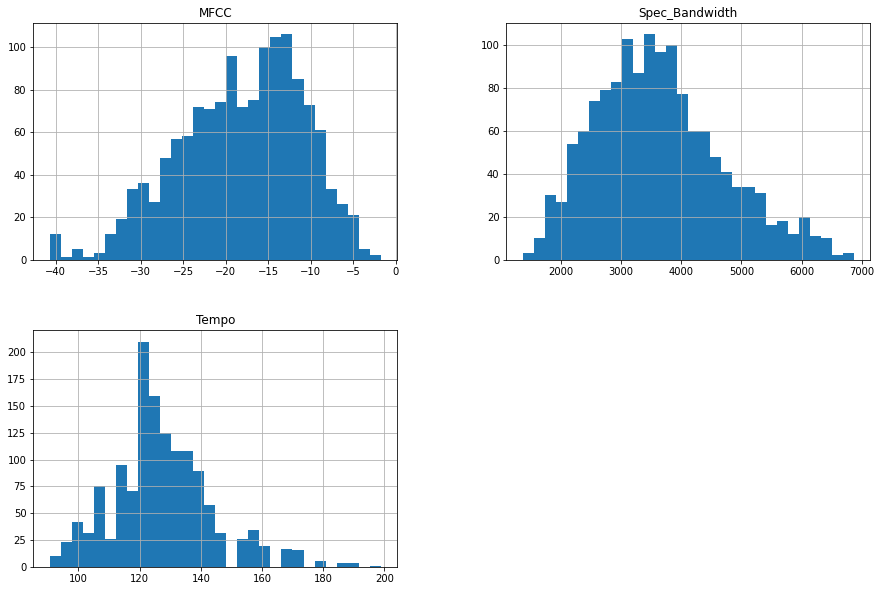

In [ ]:
# Plotting histograms of all the features extracted

print(features.hist(bins=30, figsize=(15, 10)))

In [ ]:
# Creating target variable from dataframe

target = df.iloc[:, 0]

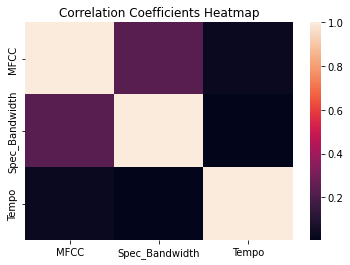

In [ ]:
# Plotting correlation coeeficient heatmap

import seaborn as sns
ax = plt.axes()
sns.heatmap(abs(features.corr()),ax=ax)
ax.set_title('Correlation Coefficients Heatmap')
plt.show()

In [ ]:
# Converting features to np array and creating X predictor variable

X=np.array(features)

from sklearn import preprocessing

y=np.array(target)
encoding = preprocessing.LabelEncoder()
encoding.fit(y)
encoding.classes_
y=encoding.transform(y)

# Mapping the song labels with  using dict
namemapping = dict(zip(encoding.classes_, encoding.transform(encoding.classes_)))
print(f'The shape of the X predictor is: {X.shape}')
print(f'The shape of the y label is: {y.shape}')
print(f'The mapping of y label encoding is: {namemapping}')

The shape of the X predictor is: (1389, 3)
The shape of the y label is: (1389,)
The mapping of y label encoding is: {'frozen': 0, 'hakuna': 1, 'mamma': 2, 'panther': 3, 'potter': 4, 'rain': 5, 'showman': 6, 'starwars': 7}


In [ ]:
# Importing more libraries for model development

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Splitting of data into training and validation
                  
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1111, 3), (278, 3), (1111,), (278,))

In [ ]:
# Scaling the training data

scaler=MinMaxScaler()
X_train_norm=scaler.fit_transform(X_train)

In [ ]:
# Scaling the validation data

scaler=MinMaxScaler()
X_val_norm=scaler.fit_transform(X_val)

In [ ]:
# Random Forest Implementation

rfc = RandomForestClassifier(random_state=123)
param_grid = { 'n_estimators': [10,50,100,200,300,400,500]}

CV_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid,verbose=2,n_jobs=-1,cv=5)
CV_rfc.fit(X_train_norm, y_train)

print(f'Hyperparameter used for modelling: {CV_rfc.best_estimator_}')
print(f'Training Accuracy :{CV_rfc.best_score_}')
print(f'Validation Accuracy :{CV_rfc.score(X_val_norm, y_val)}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Hyperparameter used for modelling: RandomForestClassifier(n_estimators=50, random_state=123)
Training Accuracy :0.2610188664000323
Validation Accuracy :0.24820143884892087


In [ ]:
# Storing predictied y labels 

rfc_y_preds=CV_rfc.predict(X_val_norm)
rfc_y_preds=list(rfc_y_preds)
print(*rfc_y_preds)

6 3 4 2 7 3 7 5 3 3 2 7 4 1 1 1 0 3 4 0 6 5 0 4 7 2 7 5 6 1 2 7 1 3 7 6 3 7 3 3 0 3 4 4 5 6 4 0 3 3 7 3 2 6 0 4 5 1 5 6 6 6 3 5 2 3 1 3 0 3 7 2 0 5 4 3 6 5 1 7 7 7 0 0 4 0 4 1 7 4 1 7 2 7 7 7 0 7 2 6 4 3 4 6 4 4 7 1 4 0 6 6 5 0 2 4 0 4 7 3 1 6 4 3 7 3 7 7 3 2 7 2 2 3 1 1 1 6 3 7 0 3 0 4 7 6 3 7 1 6 7 4 2 7 2 0 7 4 5 4 0 2 7 4 1 0 4 7 0 6 3 1 1 4 4 1 5 0 6 2 4 0 5 3 4 5 4 1 5 3 4 1 4 4 6 4 7 1 7 4 3 7 4 6 6 1 7 7 3 6 7 7 4 7 0 6 0 0 6 6 6 5 5 1 3 0 0 3 6 3 4 5 5 6 6 4 7 2 1 3 4 4 7 7 0 3 3 7 3 3 1 2 4 5 4 7 4 3 7 7 6 0 6 6 4 4 6 7 7 7 4 4 4 3 0 7 6 2


In [ ]:
# Print classification report 

print(classification_report(y_val, rfc_y_preds ,target_names=['Panther','Potter','StarWars','Rain','Hakuna','Mamma','Showman','Frozen']))
rfc_accuracy=accuracy_score(y_val, rfc_y_preds)

              precision    recall  f1-score   support

     Panther       0.16      0.15      0.16        33
      Potter       0.37      0.29      0.32        35
    StarWars       0.35      0.20      0.25        35
        Rain       0.12      0.14      0.13        35
      Hakuna       0.22      0.31      0.26        35
       Mamma       0.20      0.11      0.15        35
     Showman       0.33      0.34      0.34        35
      Frozen       0.29      0.43      0.34        35

    accuracy                           0.25       278
   macro avg       0.26      0.25      0.24       278
weighted avg       0.26      0.25      0.24       278



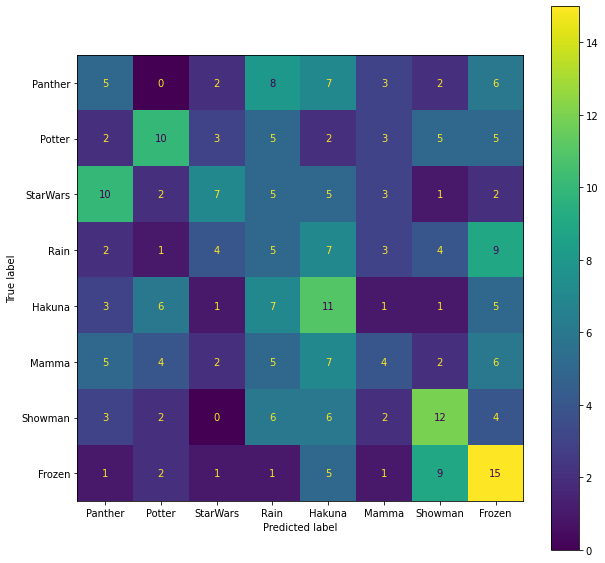

In [ ]:
# Confusion matrix

fig, ax = plt.subplots(figsize=(10, 10))
cm=confusion_matrix(y_val, rfc_y_preds)
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['Panther','Potter','StarWars','Rain','Hakuna','Mamma','Showman','Frozen'])
cmd_obj.plot(ax=ax)

In [ ]:
# Support Vector Machine Implementation
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['poly','rbf']}
from sklearn.svm import SVC
optimal_para=GridSearchCV(SVC(), param_grid, cv=5)
optimal_para.fit(X_train_norm,y_train)
clf_svm = optimal_para
clf_svm.fit(X_train_norm,y_train)
clf_svm.score(X_val_norm,y_val)

print(f'Hyperparameter used for modelling:{clf_svm.best_estimator_}')
print(f'Training Accuracy:{clf_svm.score(X_train_norm,y_train)}')
print(f'Validation Accuracy {clf_svm.score(X_val_norm,y_val)}')

Hyperparameter used for modelling:SVC(C=10, gamma=0.1)
Training Accuracy:0.30423042304230424
Validation Accuracy 0.2733812949640288


In [ ]:
# Store label prediction in list.

SVM_y_preds=clf_svm.predict(X_val_norm)
SVM_y_preds=list(SVM_y_preds)
print(*SVM_y_preds)

7 3 7 2 7 0 7 0 7 2 2 3 3 1 0 7 0 3 0 3 7 3 0 7 7 2 7 3 2 1 0 7 1 3 7 7 7 7 3 3 0 7 1 5 0 7 1 3 3 5 7 3 3 3 0 3 0 7 1 7 7 3 3 1 2 7 1 3 3 7 2 7 3 0 2 3 3 0 1 7 7 7 0 0 7 2 7 1 3 3 1 7 2 7 7 0 0 7 1 7 3 3 3 0 0 0 7 1 1 0 7 7 0 0 2 0 0 1 7 3 3 1 3 2 7 3 3 7 3 2 7 0 1 7 1 1 3 3 0 7 0 3 1 3 7 1 3 7 1 5 3 3 0 7 0 3 7 7 0 7 3 3 7 3 2 3 3 7 0 3 2 0 1 3 3 1 0 0 7 0 3 0 5 0 3 3 3 3 3 3 0 1 0 7 2 7 7 1 7 3 0 7 0 3 7 1 7 3 5 3 3 3 7 7 7 7 3 0 7 7 7 0 0 1 3 0 0 3 7 3 7 0 5 3 7 2 7 0 1 5 0 0 3 7 3 3 7 7 3 3 1 3 5 0 3 7 3 2 7 3 7 7 7 7 7 7 7 7 7 7 5 0 5 3 0 7 3 3


In [ ]:
# Print classification report

import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_val, SVM_y_preds,target_names=['Panther','Potter','StarWars','Rain','Hakuna','Mamma','Showman','Frozen'])) 
svm_accuracy=accuracy_score(y_val, SVM_y_preds)

              precision    recall  f1-score   support

     Panther       0.20      0.33      0.25        33
      Potter       0.40      0.34      0.37        35
    StarWars       0.39      0.20      0.26        35
        Rain       0.17      0.40      0.24        35
      Hakuna       0.00      0.00      0.00        35
       Mamma       0.40      0.11      0.18        35
     Showman       0.00      0.00      0.00        35
      Frozen       0.33      0.80      0.46        35

    accuracy                           0.27       278
   macro avg       0.24      0.27      0.22       278
weighted avg       0.24      0.27      0.22       278



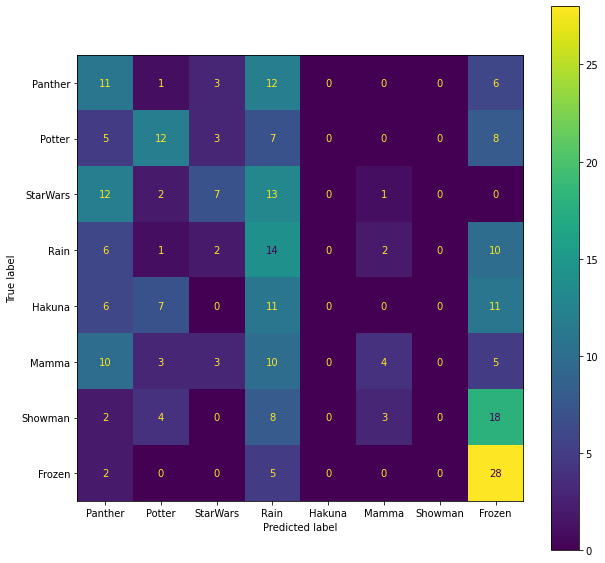

In [ ]:
# Confusion matrix

fig, ax = plt.subplots(figsize=(10, 10))
cm=confusion_matrix(y_val, SVM_y_preds)
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['Panther','Potter','StarWars','Rain','Hakuna','Mamma','Showman','Frozen'])
cmd_obj.plot(ax=ax)

#9 Conclusion
Results obtained from the Advanced Solution project are as follows:-

By Random Forest Classifier
1. Training Accuracy :0.2610188664000323 (approximately 26%)
2. Validation Accuracy :0.24820143884892087 (approximately 24%)

By Support Vector Machine
1. Training Accuracy:0.30423042304230424 (approximately 30%)
2. Validation Accuracy 0.2733812949640288 (approximately 27%)


By the end of the project it is concluded that Support Vector Machine is giving better results as compared to Random Forest Classifier. The scope of the project could be increased by implementing different deep learning models such as Neural Network in order to improve the model performance in terms of different evaluation metrices inclusive of accuracy, confusion matrix, f-score, precision, recall etc.